# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Customer Personality Analysis & Segmentation</p>

<p style="text-align:center; ">
<img src="https://www.segmentify.com/wp-content/uploads/2021/08/Top-Customer-Segmentation-Examples-every-Marketer-Needs-to-Know.png" style='width: 650px; height: 350px;'>
</p>

<p style="text-align:justify; ">
<B>Customer segmentation</B> is the process of separating customers into groups based on the certain traits they share.

Segmentation offers a simple way of organizing and managing company’s relationships with customers. This process also makes it easy to tailor and personalize company’s marketing, service, and sales efforts to the needs of specific groups. This helps to boost customer loyalty and conversions.
</p>    

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#682F2F"> Importing Libraries</font>](#1)                   |7   | [<font color="#682F2F"> Digging Deeper</font>](#7)                 |
|2   | [<font color="#682F2F"> About Dataset</font>](#2)                         |8   | [<font color="#682F2F"> Correlation Map</font>](#8)   |     
|3   | [<font color="#682F2F"> Basic Exploration</font>](#3)                     |9  | [<font color="#682F2F"> Dimensionality Reduction</font>](#9)|
|4   | [<font color="#682F2F"> Dataset Summary</font>](#4)                       |10  | [<font color="#682F2F"> Customer Segmentation</font>](#10)   |       
|5   | [<font color="#682F2F"> Data Preprocessing</font>](#5)      |11  | [<font color="#682F2F"> Customer's Cluster Profiling</font>](#11)    |     
|6   | [<font color="#682F2F"> Custom Palette For Visualization</font>](#6)              |12  | [<font color="#682F2F"> Thank You</font>](#12)  |     
   

   

<a id="1"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')


from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<a id="2"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

#### Context

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. 

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


#### Content

**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

#### Target

Need to perform clustering to summarize customer segments.

<a id="3"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Loading Data</p>

In [2]:
data = pd.read_csv(r"C:\Users\Pelux\Desktop\Jupyter Notebook\CUSTOMER SEGMENTATION\marketing_campaign.csv", sep="\t")

<a id="3"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [3]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

Shape Of The Dataset : (2240, 29)

Glimpse Of The Dataset :


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


<a id="3"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Cleaning</p>

In [4]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [5]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

Null values of the Dataset :


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Insights:**

* There are missing values in **Income**. We will drop the rows that have missing income values.
* **Dt_Customer** that indicates the date a customer joined in this dataset is not parsed as DateTime.
* We will encode the categorical features into numerical form later.


<a id="5"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [6]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

After dropping null values, the shape of the Dataset is (2216, 29)
After dropping null values, null values of the Dataset :


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

print(f"Newest customer's enrolment date is {max(dates)}")
print(f"Oldest customer's enrolment date is {min(dates)}")

Newest customer's enrolment date is 2014-12-06
Oldest customer's enrolment date is 2012-01-08


In [8]:
days = []
newest = max(dates) 
for i in dates:
    duration = newest - i
    days.append(duration)
data["Customer Loyalty"] = days
data["Customer Loyalty"] = data["Customer Loyalty"].dt.days
data["Age"] = 2015 - data["Year_Birth"]
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Parental Status"] = np.where(data["Children"] > 0, 1, 0)
data["Marital_Status"].replace({"Married":"Couple", "Together":"Couple", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"}, inplace = True)
data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}, inplace = True)
data["Total Promo"] =  data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
data.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog","NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"}, inplace = True)
data = data[["ID","Age","Education","Marital Status","Parental Status","Children","Kidhome","Teenhome","Income","Spent","Customer Loyalty","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]

data = data[data["Age"] < 90]
data = data[data["Income"] < 600000]

In [9]:
print("After preprocessing, let's have a glimpse of the final dataset :")
data.head().style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

After preprocessing, let's have a glimpse of the final dataset :


,ID,Age,Education,Marital Status,Parental Status,Children,Kidhome,Teenhome,Income,Spent,Customer Loyalty,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,5524,58,Graduate,Alone,0,0,0,0,58138.000000,1617,971,58,635,88,546,172,88,88,8,10,4,3,0,7
1,2174,61,Graduate,Alone,1,2,1,1,46344.000000,27,125,38,11,1,6,2,1,6,1,1,2,2,0,5
2,4141,50,Graduate,Couple,0,0,0,0,71613.000000,776,472,26,426,49,127,111,21,42,8,2,10,1,0,4
3,6182,31,Graduate,Couple,1,1,1,0,26646.000000,53,65,26,11,4,20,10,3,5,2,0,4,2,0,6
4,5324,34,Postgraduate,Couple,1,1,1,0,58293.000000,422,321,94,173,43,118,46,27,15,5,3,6,5,0,5


In [10]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe().style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

After preprocessing, let's have a look on the summary of the dataset :


,ID,Age,Parental Status,Children,Kidhome,Teenhome,Income,Spent,Customer Loyalty,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5585.160940,46.086347,0.714286,0.947559,0.441682,0.505877,51958.810579,607.268083,512.144213,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,4.088156,2.672242,5.806510,2.324593,0.298373,5.321429
std,3247.523735,11.701599,0.451856,0.749466,0.536955,0.544253,21527.278844,602.513364,232.551465,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,2.742187,2.927542,3.250939,1.924507,0.679570,2.425597
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,38.000000,0.000000,0.000000,0.000000,0.000000,35233.500000,69.000000,340.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,1.000000,0.000000,3.000000
50%,5454.500000,45.000000,1.000000,1.000000,0.000000,0.000000,51371.000000,397.000000,513.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,4.000000,2.000000,5.000000,2.000000,0.000000,6.000000
75%,8418.500000,56.000000,1.000000,1.000000,1.000000,1.000000,68487.000000,1048.000000,686.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,3.000000,0.000000,7.000000
max,11191.000000,75.000000,1.000000,3.000000,2.000000,2.000000,162397.000000,2525.000000,1063.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,27.000000,28.000000,13.000000,15.000000,4.000000,20.000000


In [11]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

,count,unique,top,freq
Education,2212,3,Graduate,1115
Marital Status,2212,2,Couple,1428


<a id="6"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [12]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D4C8BA","figure.facecolor":"#D4C8BA"})
sns.set_context("poster",font_scale = .7)

palette = ["#101B15","#3A392B","#7A7D58","#FFF7B6","#DD9954","#94583C","#601600"]
# palette_cmap = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
palette_cmap = ["#B9C0C9","#D6B2B1","#F3AB60","#9F8A78","#9E726F","#682F2F"]
cluster = ["#B9C0C9","#682F2F","#7A7D58","#DD9954"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# sns.palplot(sns.color_palette(cluster))
# plt.show()

#682F2F #585858

<a id="7"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Digging Deeper</p>

Let's have a look on the distribution of customer's age :


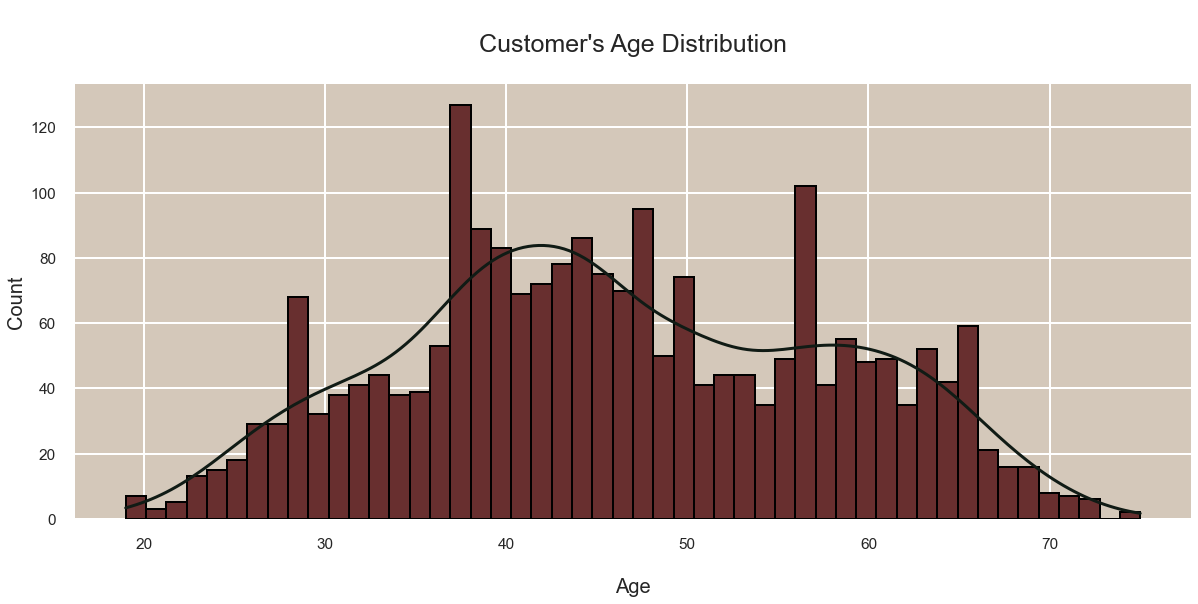

In [13]:
print(f"Let's have a look on the distribution of customer's age :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["Age"],color="#682F2F",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color(palette[0])
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* We can see it's a normal distribution of customer's age.
* Most of the customers are from 36 to 50.

Let's have a look on the distribution of customer's income and spending :


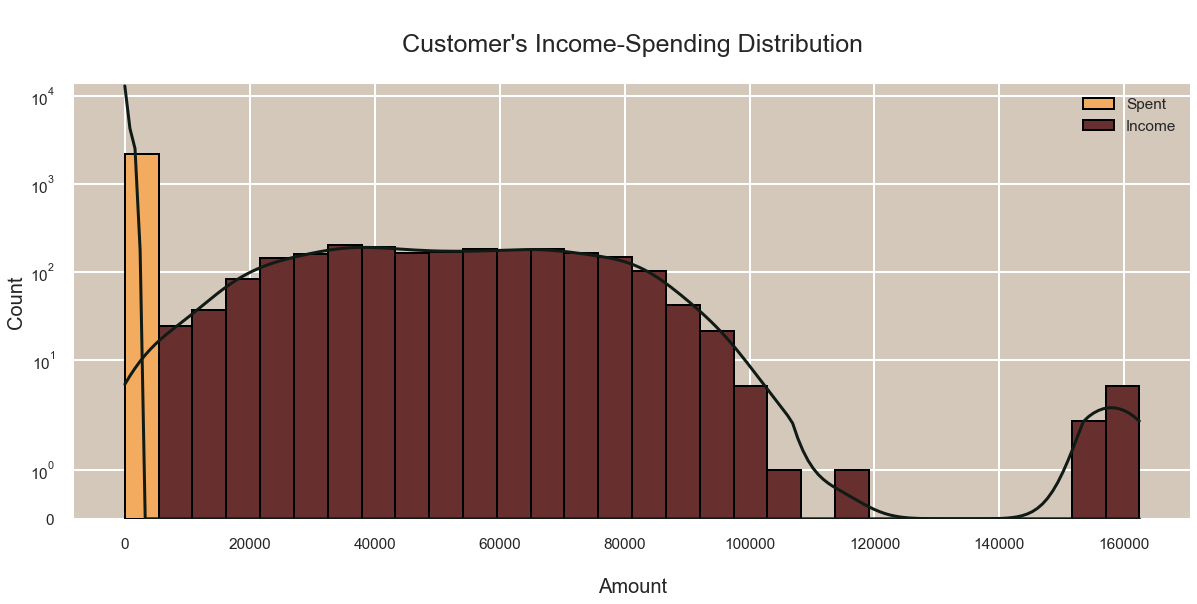

In [14]:
print(f"Let's have a look on the distribution of customer's income and spending :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data[["Spent","Income"]],palette=["#F3AB60","#682F2F"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color(palette[0])
p.axes.lines[1].set_color(palette[0])
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* Most of the customers income range is in between 20000 to 80000
* Bust almost all customers spend very few portion of their income.

Let's have a look on the customer's education :


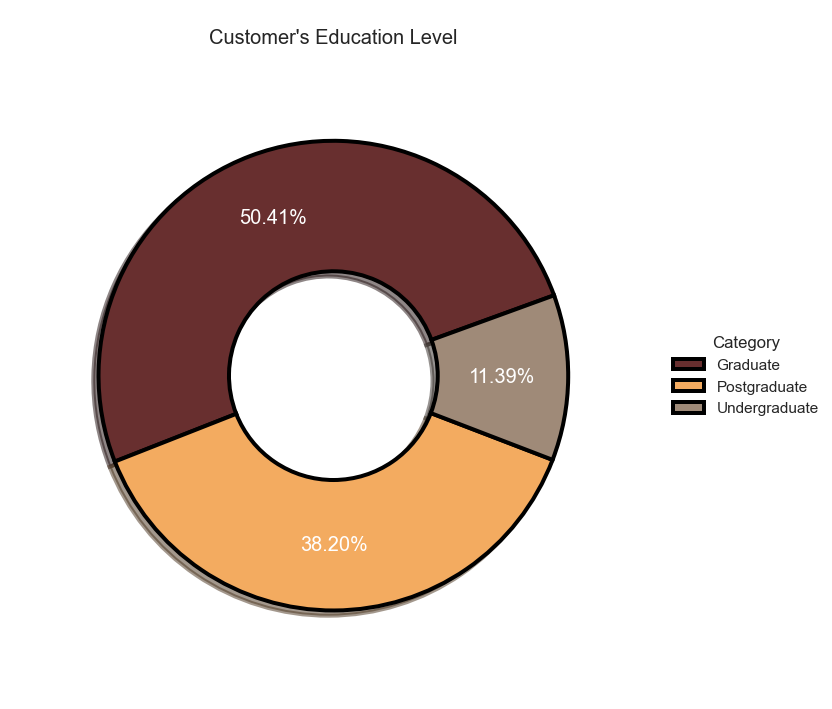

In [15]:
print(f"Let's have a look on the customer's education :")
plt.subplots(figsize=(12, 12))

labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([data["Education"].value_counts()[0],
                                    data["Education"].value_counts()[1],
                                    data["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#682F2F","#F3AB60","#9F8A78"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20)
plt.show()

**Insights:**

* Customers have three education levels : Undergraduate, Graduate, Postgraduate
* 11.39% customers are in undergraduate level, 50.41% have completed graduation and 38.2% are on postgraduation level.

Let's have a look on the distribution of customer's income and spending on basis of education level :


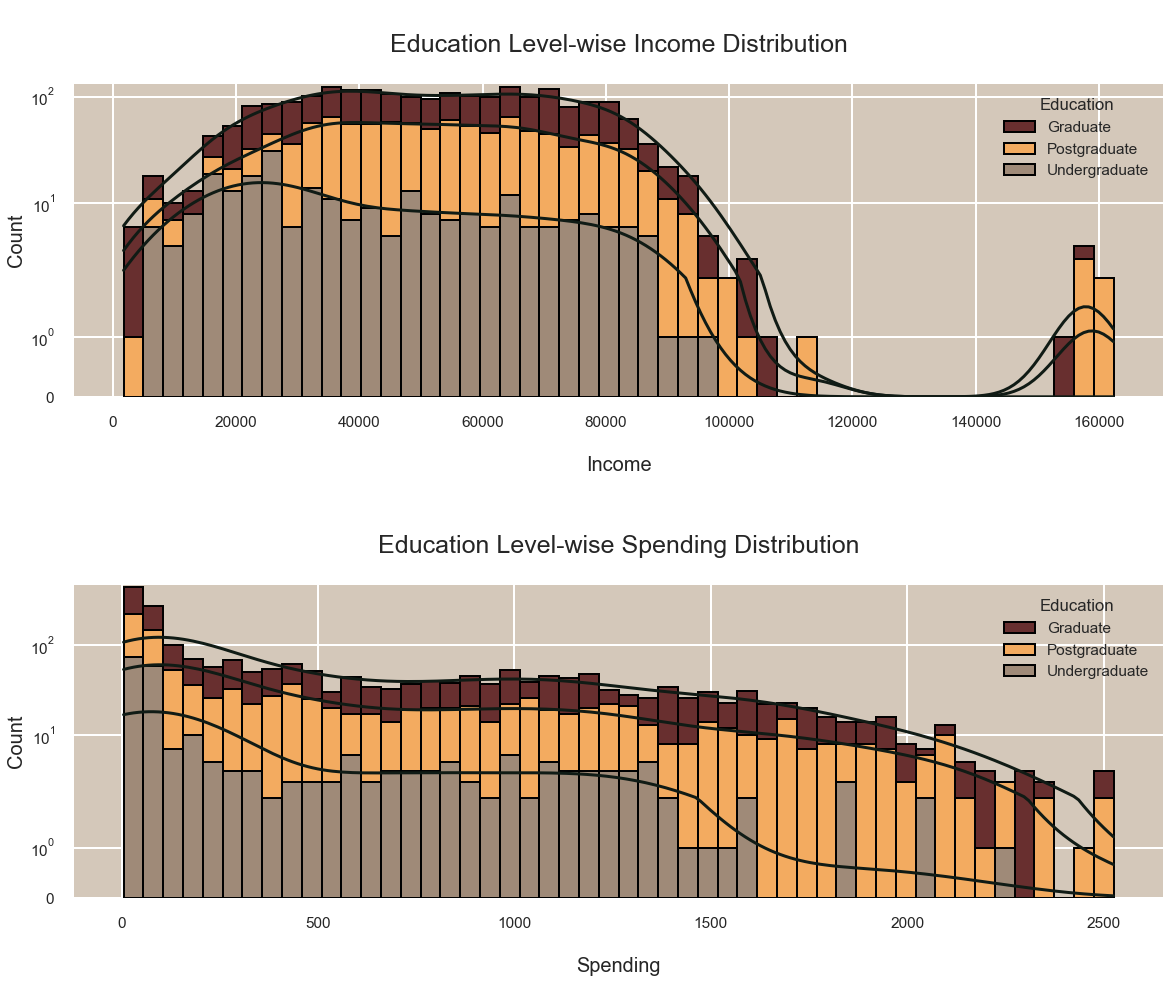

In [16]:
print(f"Let's have a look on the distribution of customer's income and spending on basis of education level :")

_, axes = plt.subplots(2,1,figsize=(20,16),sharex=False)
plt.tight_layout(pad=15.0)

sns.histplot(data=data,x="Income",hue="Education",multiple="stack",palette=["#682F2F","#F3AB60","#9F8A78"],ax=axes[0],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[0].lines[0].set_color(palette[0])
axes[0].lines[1].set_color(palette[0])
axes[0].lines[2].set_color(palette[0])
axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level-wise Income Distribution\n",fontsize=25)
axes[0].set_ylabel("Count",fontsize=20)
axes[0].set_xlabel("\nIncome",fontsize=20)


sns.histplot(data=data,x="Spent",hue="Education",multiple="stack",palette=["#682F2F","#F3AB60","#9F8A78"],ax=axes[1],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[1].lines[0].set_color(palette[0])
axes[1].lines[1].set_color(palette[0])
axes[1].lines[2].set_color(palette[0])
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level-wise Spending Distribution\n",fontsize=25)
axes[1].set_ylabel("Count",fontsize=20)
axes[1].set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the undergraduate level customer's income range is in between 10000 to 80000 and spending in between 0 to 1400.
* Most of the graduate level customer's income range is in between 20000 to 85000 and spending in between 0 to 2000.
* Most of the postgraduate level customer's income range is in between 30000 to 80000 and spending in between 0 to 2000.

Let's have a look on the distribution of customer's income and spending on basis of marital and parental status :


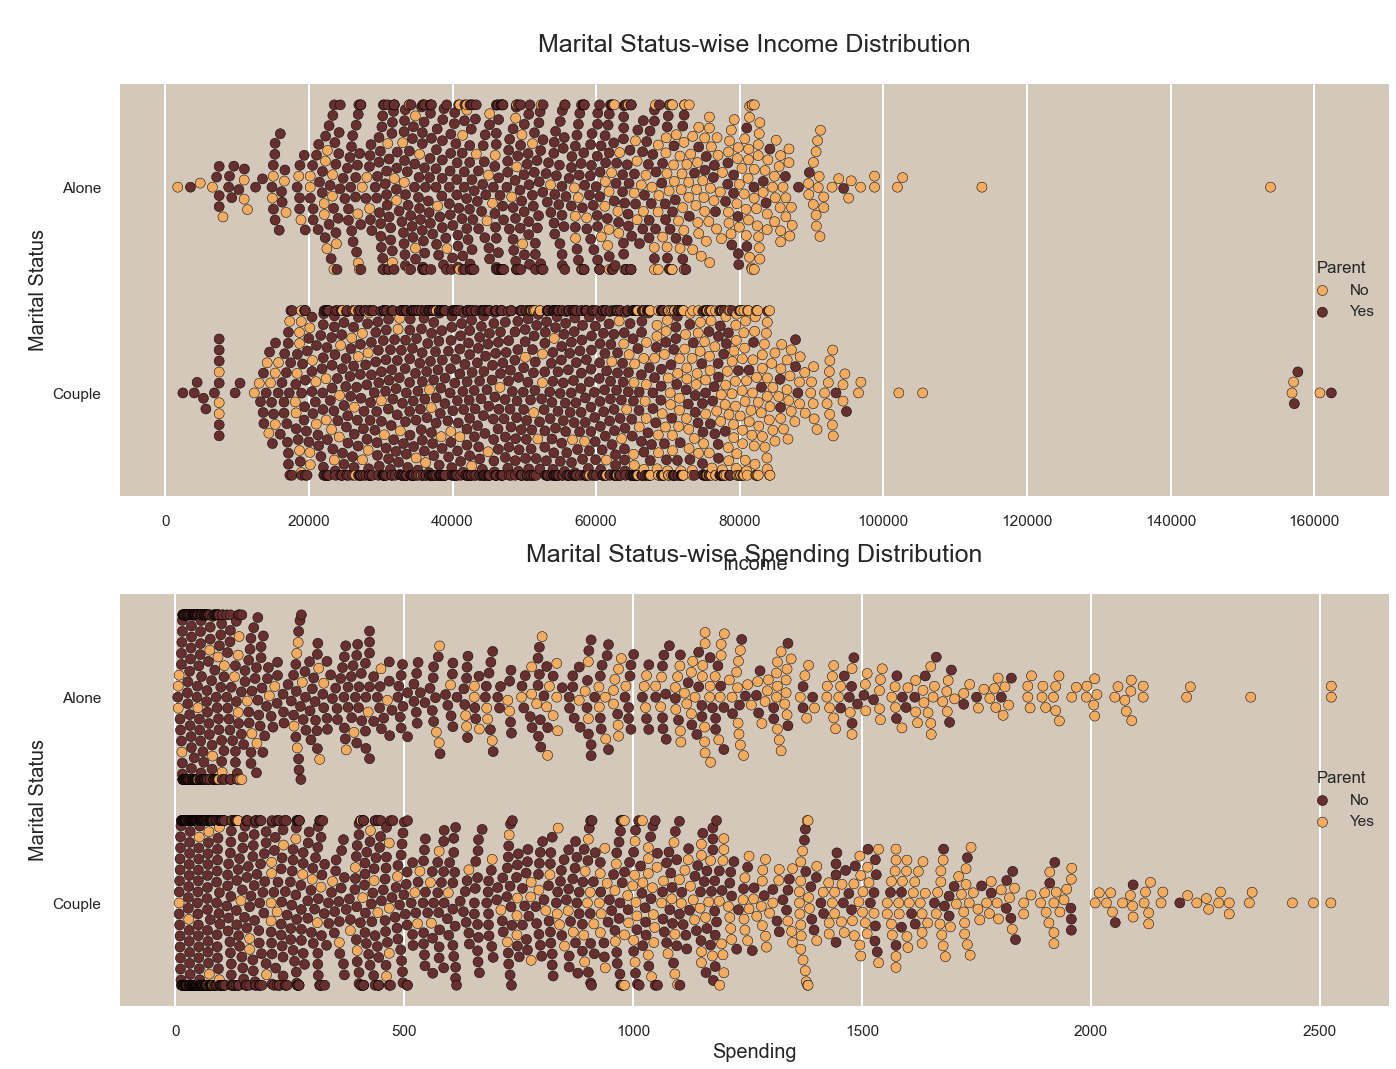

In [17]:
print(f"Let's have a look on the distribution of customer's income and spending on basis of marital and parental status :")

_, axes = plt.subplots(2,1,figsize=(20,15),sharex=False)
plt.tight_layout(pad=6.0)

sns.swarmplot(x=data["Income"],y=data["Marital Status"],hue=data["Parental Status"],palette=["#F3AB60","#682F2F"],ax=axes[0],marker="o",size=10,alpha=1,linewidth=0.5,edgecolor="black")
axes[0].legend(["No","Yes"],title="Parent", edgecolor = "#1c1c1c",loc="center right")
axes[0].set_title("\nMarital Status-wise Income Distribution\n",fontsize=25)
axes[0].set_xlabel("\nIncome",fontsize=20)
axes[0].set_ylabel("\nMarital Status",fontsize=20)

sns.swarmplot(x=data["Spent"],y=data["Marital Status"],hue=data["Parental Status"],palette=["#F3AB60","#682F2F"],ax=axes[1],marker="o",size=10,alpha=1,linewidth=0.5,edgecolor="black")
axes[1].legend(["No","Yes"],title="Parent", edgecolor = "#1c1c1c",loc="center right")
axes[1].set_title("\nMarital Status-wise Spending Distribution\n",fontsize=25)
axes[1].set_xlabel("Spending",fontsize=20)
axes[1].set_ylabel("\nMarital Status",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the customers live together. 
* Customers who live together and are parents earn much and spend much.

Let's have a look on the distribution of customer's children :


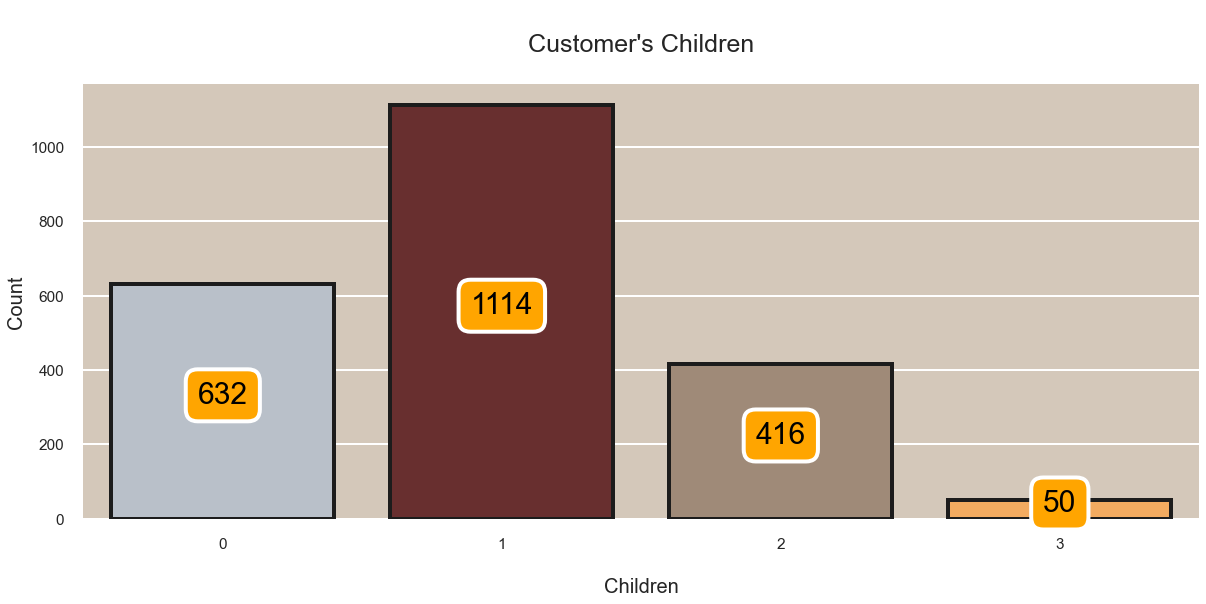

In [18]:
print(f"Let's have a look on the distribution of customer's children :")
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Children"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nChildren",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* 632 customers have no child.
* Most of the customers have one child. 
* 416 customers have two child.
* 50 customers have three child. 


<a id="8"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Map</p>

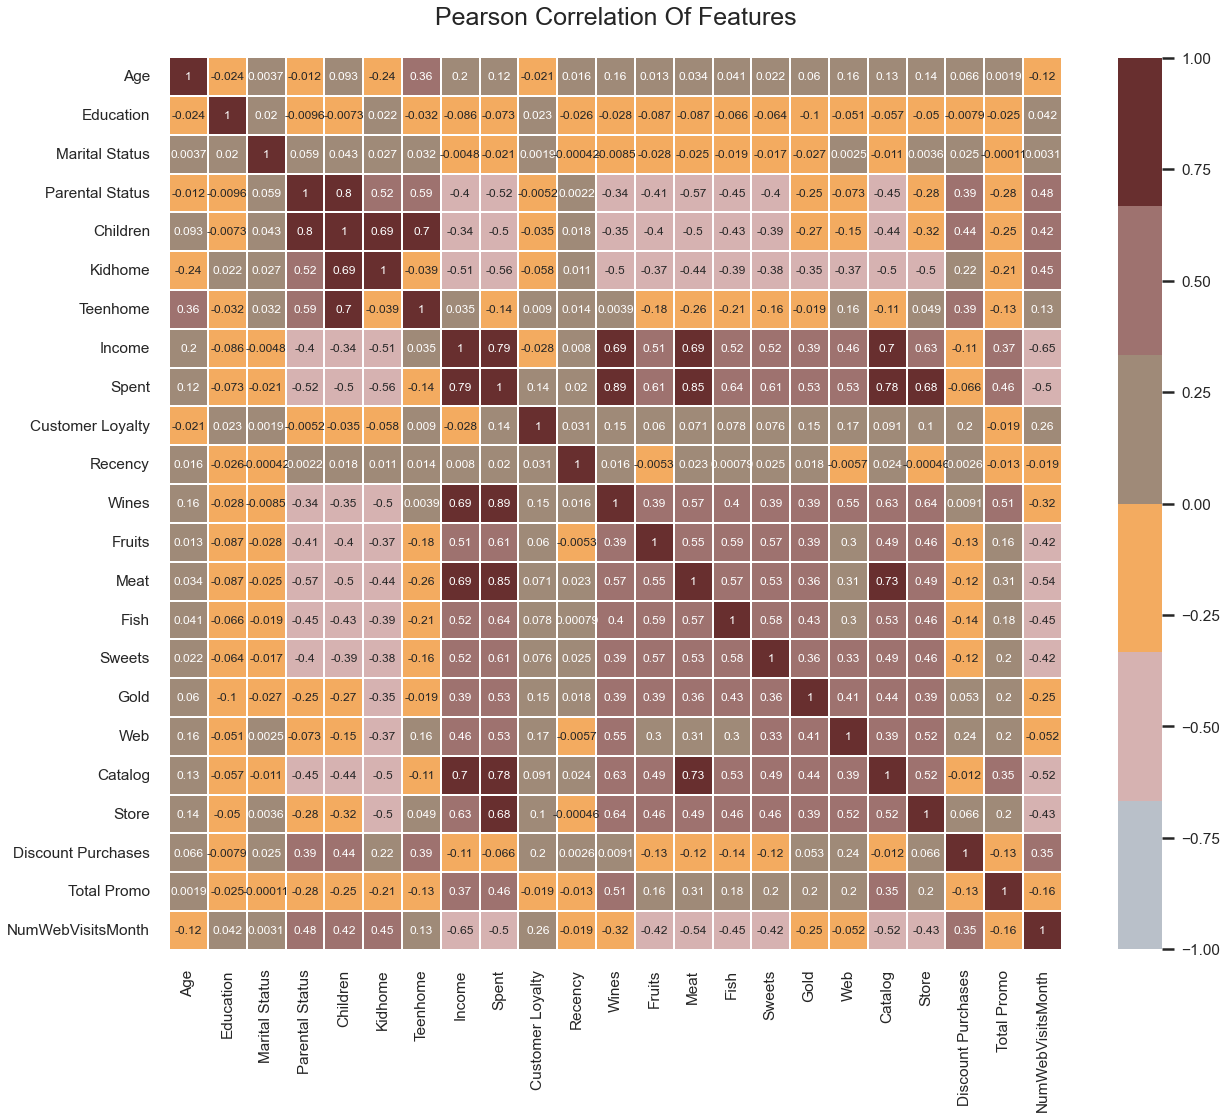

In [19]:
catcol = ["Education","Marital Status"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(data.drop(columns="ID").corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

**Insights:**

* High correlation between customer's income and spending. Also high correlation between buying wine, meat and buying through catalog and stores with income and spending.
* High correlation between buying meat and buying through catalog.

<a id="9"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dimensionality Reduction</p>

<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>
In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.* 

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 3.

In [20]:
dataC = data.copy()
scaler = StandardScaler()
dataC = scaler.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns= data.columns)
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.head().style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

After scaling, let's have a glimpse of the scaled dataset :


,ID,Age,Education,Marital Status,Parental Status,Children,Kidhome,Teenhome,Income,Spent,Customer Loyalty,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,-0.018837,1.018352,-0.893586,-1.349603,-1.581139,-1.264598,-0.822754,-0.929699,0.287105,1.676245,1.973583,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,1.426865,2.503607,-0.555814,0.351030,-0.439160,0.692181
1,-1.050626,1.274785,-0.893586,-1.349603,0.632456,1.404572,1.040021,0.908097,-0.260882,-0.963297,-1.665144,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-1.126420,-0.571340,-1.171160,-0.168701,-0.439160,-0.132545
2,-0.444797,0.334530,-0.893586,0.740959,-1.581139,-1.264598,-0.822754,-0.929699,0.913196,0.280110,-0.172664,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,1.426865,-0.229679,1.290224,-0.688432,-0.439160,-0.544908
3,0.183824,-1.289547,-0.893586,0.740959,0.632456,0.069987,1.040021,-0.929699,-1.176114,-0.920135,-1.923210,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.761665,-0.913000,-0.555814,-0.168701,-0.439160,0.279818
4,-0.080437,-1.033114,0.571657,0.740959,0.632456,0.069987,1.040021,-0.929699,0.294307,-0.307562,-0.822130,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,0.332600,0.111982,0.059532,1.390492,-0.439160,-0.132545


In [21]:
scaled_dataC = scaled_data.copy()
pca = PCA(n_components = 3,random_state = 42)
scaled_dataC = pca.fit_transform(scaled_dataC)
pca_data = pd.DataFrame(scaled_dataC, columns=["col1","col2", "col3"])

print("Let's have a glimpse of the PCA transformed dataset :")
pca_data.head(15).T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

Let's have a glimpse of the PCA transformed dataset :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
col1,4.576004,-2.885616,2.415763,-2.712011,-0.606506,0.566827,0.485512,-2.445958,-3.001859,-4.815396,-1.777196,3.784073,-1.832026,-1.746459,4.295949
col2,0.179025,0.183855,-0.827149,-1.658271,-0.006711,1.274968,1.541291,-0.988890,-1.248144,0.616033,-2.644247,-1.889912,1.604505,-2.820686,0.173613
col3,2.270959,-2.325667,-0.203656,-0.372965,0.560911,-0.701695,0.782514,1.254515,0.929421,0.791475,1.668063,-0.809616,-1.217355,1.748339,-0.174452


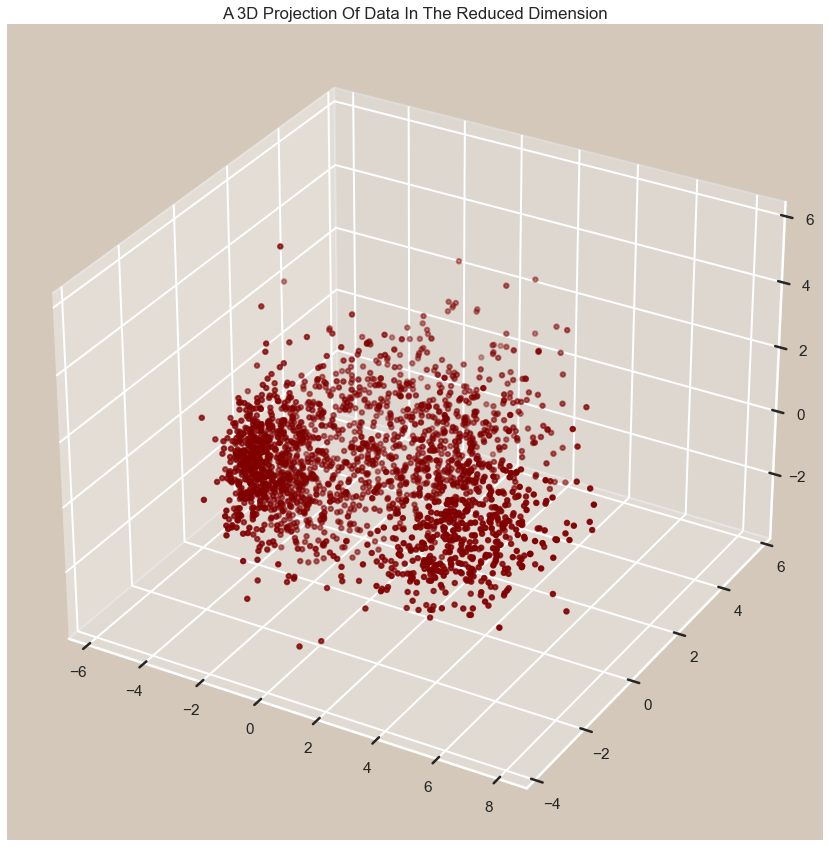

In [42]:
#A 3D Projection Of Data In The Reduced Dimension
x =pca_data["col1"]
y =pca_data["col2"]
z =pca_data["col3"]
#To plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<a id="10"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Customer Segmentation</p>

Elbow Method for determining the number of clusters :


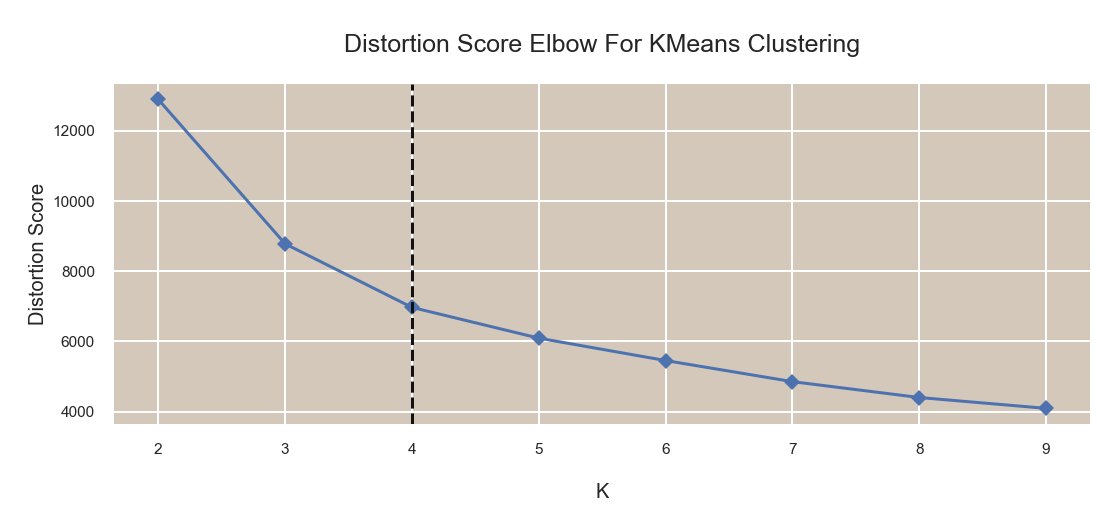

In [23]:
print("Elbow Method for determining the number of clusters :")
_, axes = plt.subplots(figsize=(20,8))

elbow = KElbowVisualizer(KMeans(), k=9, timings=False, locate_elbow=True, size=(1260,450))
elbow.fit(pca_data)

axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n",fontsize=25)
axes.set_xlabel("\nK",fontsize=20)
axes.set_ylabel("\nDistortion Score",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* We will use **k = 4**, thus there will be **four clusters** in our dataset.
* We will use **KMeans Algorithm** for clustering.

In [24]:
km = KMeans(n_clusters = 4,random_state = 42)
# ac = AgglomerativeClustering(n_clusters=4)

y_km = km.fit_predict(pca_data)
pca_data["Clusters"] = y_km
data["Clusters"]= y_km

Let's have a look on the customers quantity distribution after clustering :


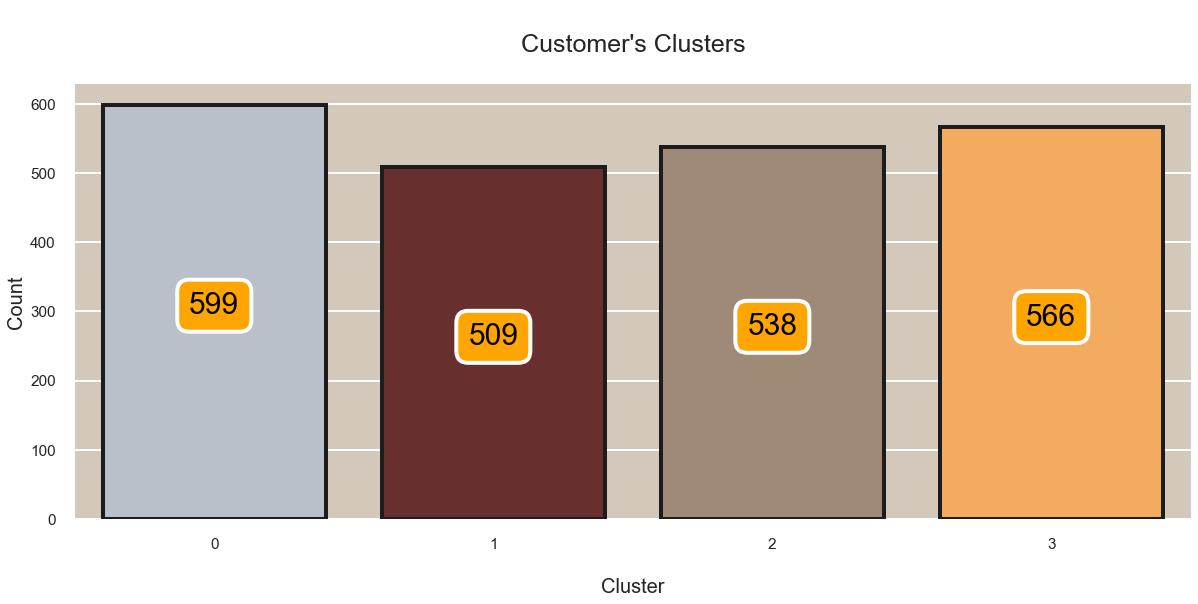

In [25]:
print("Let's have a look on the customers quantity distribution after clustering :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Clusters"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Clusters\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nCluster",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Cluster 0 has 538 customers.
* Cluster 1 has the highest amount of 599 customers.
* Cluster 2 has 509 customers.
* Cluster 3 has 566 customers.

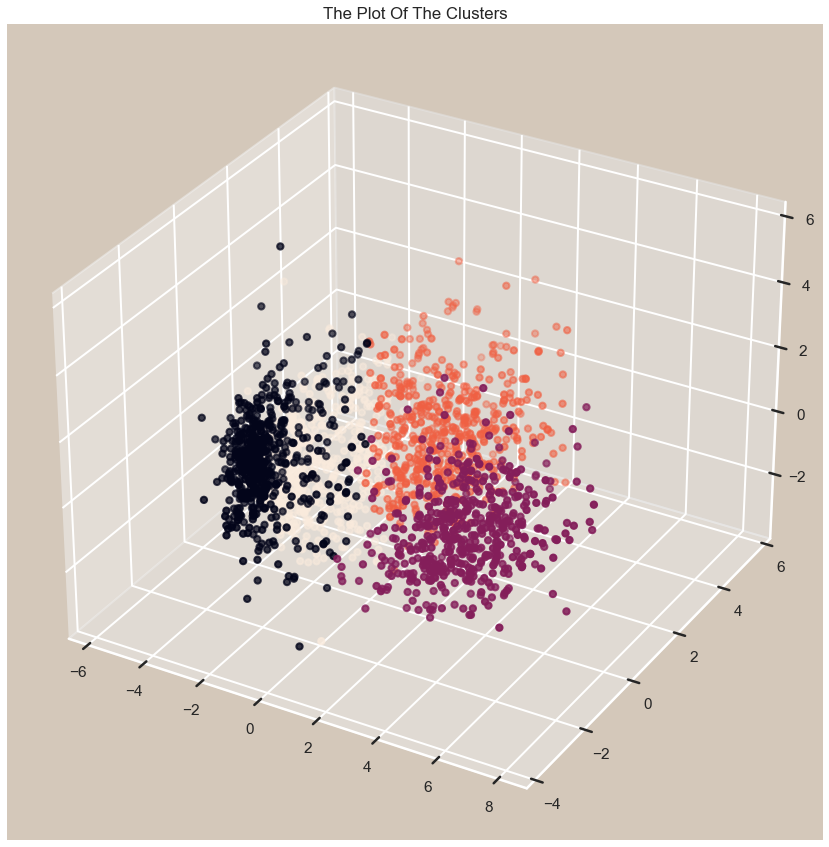

In [48]:
#Plotting the clusters
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_data["Clusters"], marker='o',)
ax.set_title("The Plot Of The Clusters")
plt.show()

Let's have a look on the characteristics of the clusters on the basis of income and spending :


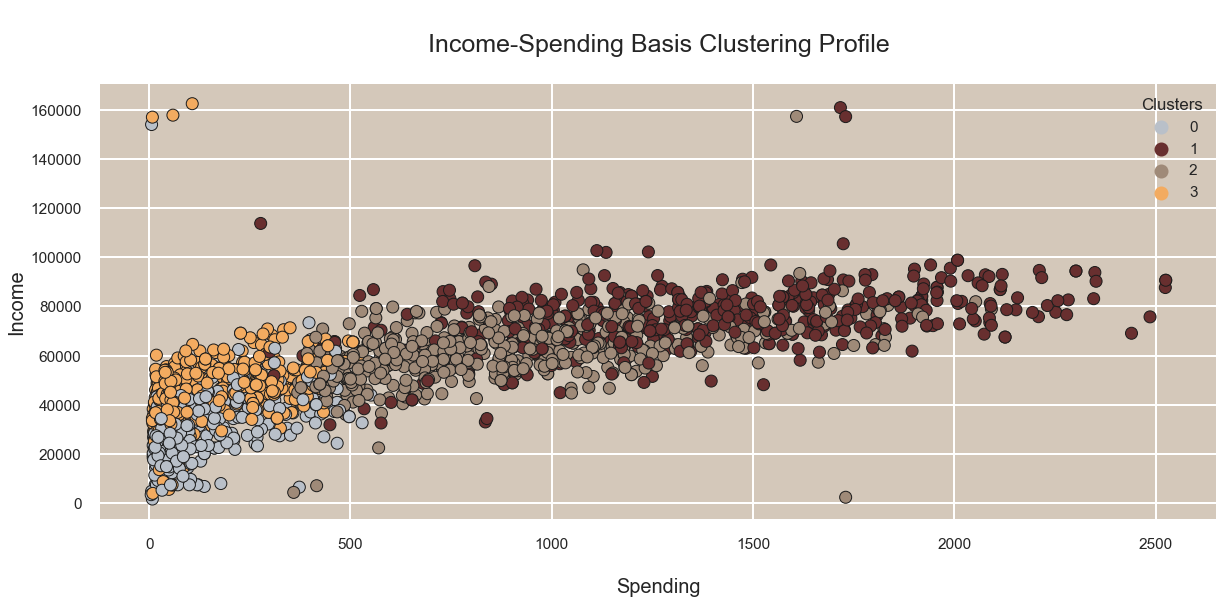

In [27]:
print(f"Let's have a look on the characteristics of the clusters on the basis of income and spending :")

_, axes = plt.subplots(figsize=(20,8))
sns.scatterplot(x=data["Spent"],y=data["Income"],hue=data["Clusters"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"],sizes=60, alpha=1,edgecolor = "#1c1c1c", linewidth = 1)
axes.set_title("\nIncome-Spending Basis Clustering Profile\n",fontsize=25)
axes.set_ylabel("Income",fontsize=20)
axes.set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the cluster 0 customers income range is in between 5000 to 40000 and spending range is in between 0 to 500.
* Most of the cluster 1 customers income range is in between 65000 to 85000 and spending range is in between 550 to 2000.
* Most of the cluster 2 customers income range is in between 50000 to 80000 and spending range is in between 250 to 1800.
* Most of the cluster 3 customers income range is in between 40000 to 60000 and spending range is in between 0 to 500.

Let's have a look on the characteristics of the clusters on the basis of spending :


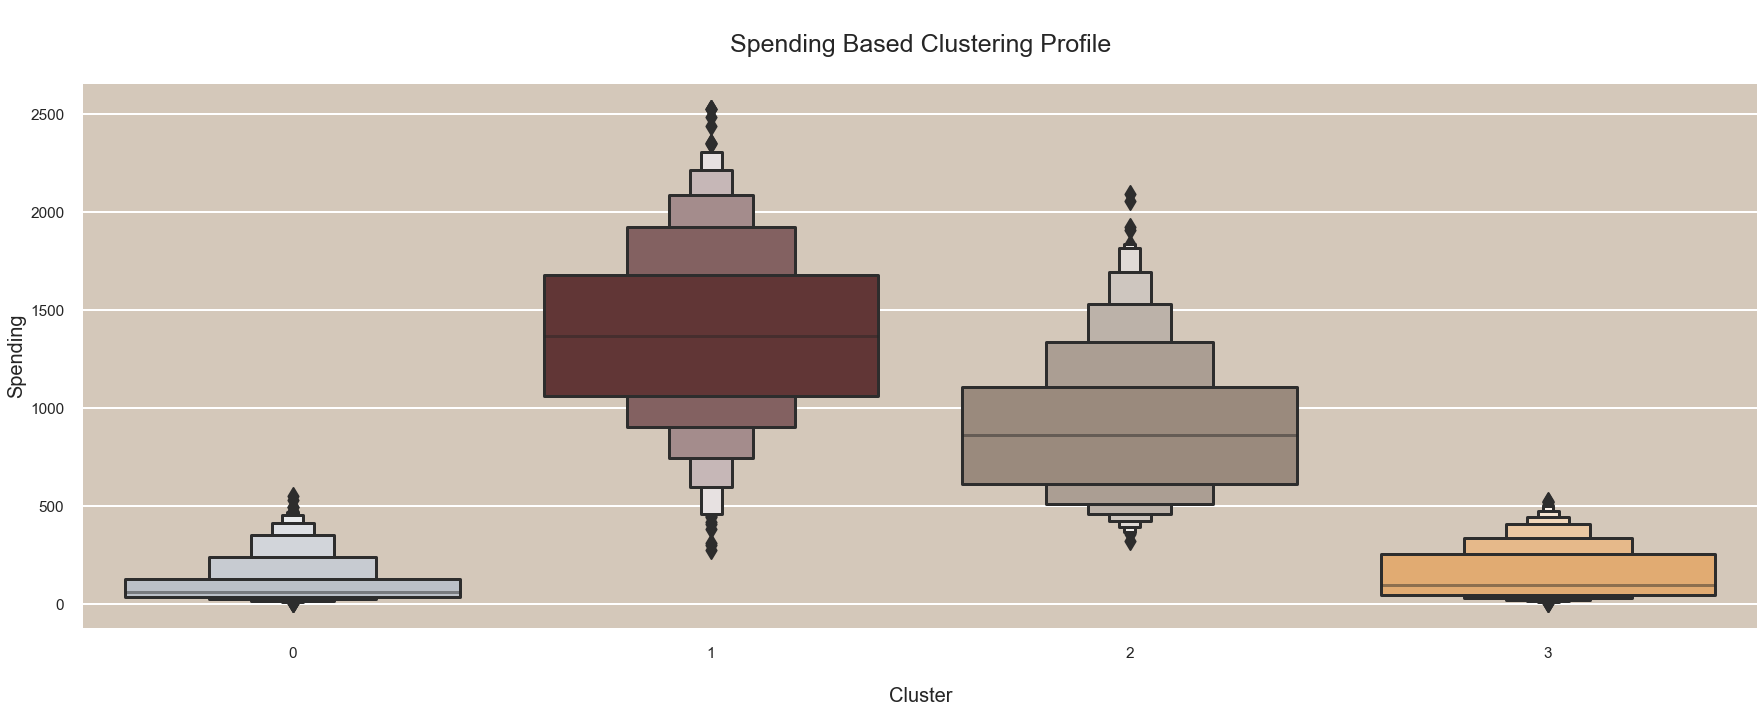

In [28]:
print(f"Let's have a look on the characteristics of the clusters on the basis of spending :")

_, axes = plt.subplots(figsize=(30,10))
sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])
# sns.swarmplot(x=data["Clusters"],y=data["Spent"],color="#B9C0C9",marker="o",size=10,alpha=0.6,linewidth=0,edgecolor="white")

axes.set_title("\nSpending Based Clustering Profile\n",fontsize=25)
axes.set_ylabel("Spending",fontsize=20)
axes.set_xlabel("\nCluster",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the cluster 0 customers spending range is in between 0 to 500.
* Most of the cluster 1 customers spending range is in between 550 to 2000.
* Most of the cluster 2 customers spending range is in between 250 to 1800.
* Most of the cluster 3 customers spending range is in between 0 to 500.


Let's have a look on the characteristics of the clusters on the basis of accepting promotions :


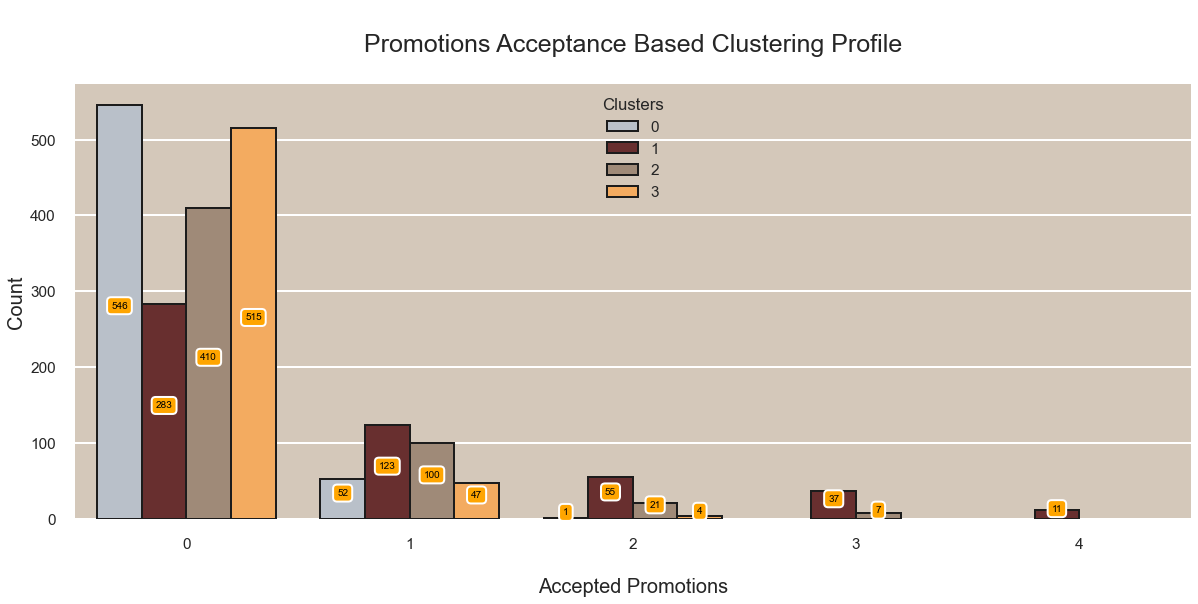

In [29]:
print(f"Let's have a look on the characteristics of the clusters on the basis of accepting promotions :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Total Promo"],hue=data["Clusters"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_yscale("linear")
p.axes.set_title("\nPromotions Acceptance Based Clustering Profile\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nAccepted Promotions",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=10,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* 546 customers of cluster 0, 283 customers of cluster 1, 410 customers of cluster 2 and 515 customers of cluster 3 have not accepted any promotions yet.  
* 52 customers of cluster 0, 123 customers of cluster 1, 100 customers of cluster 2 and 47 customers of cluster 3 have accepted only one promotions yet. 
* 1 customer of cluster 0, 55 customers of cluster 1, 21 customers of cluster 2 and 4 customers of cluster 3 have accepted two promotions.
* Only 37 customers of cluster 1 and 7 customers of cluster 2 have accepted three promotions. 
* Only 11 customers of cluster 1 have accepted Four promotions. 

Let's have a look on the characteristics of the clusters on the basis of discount purchases :


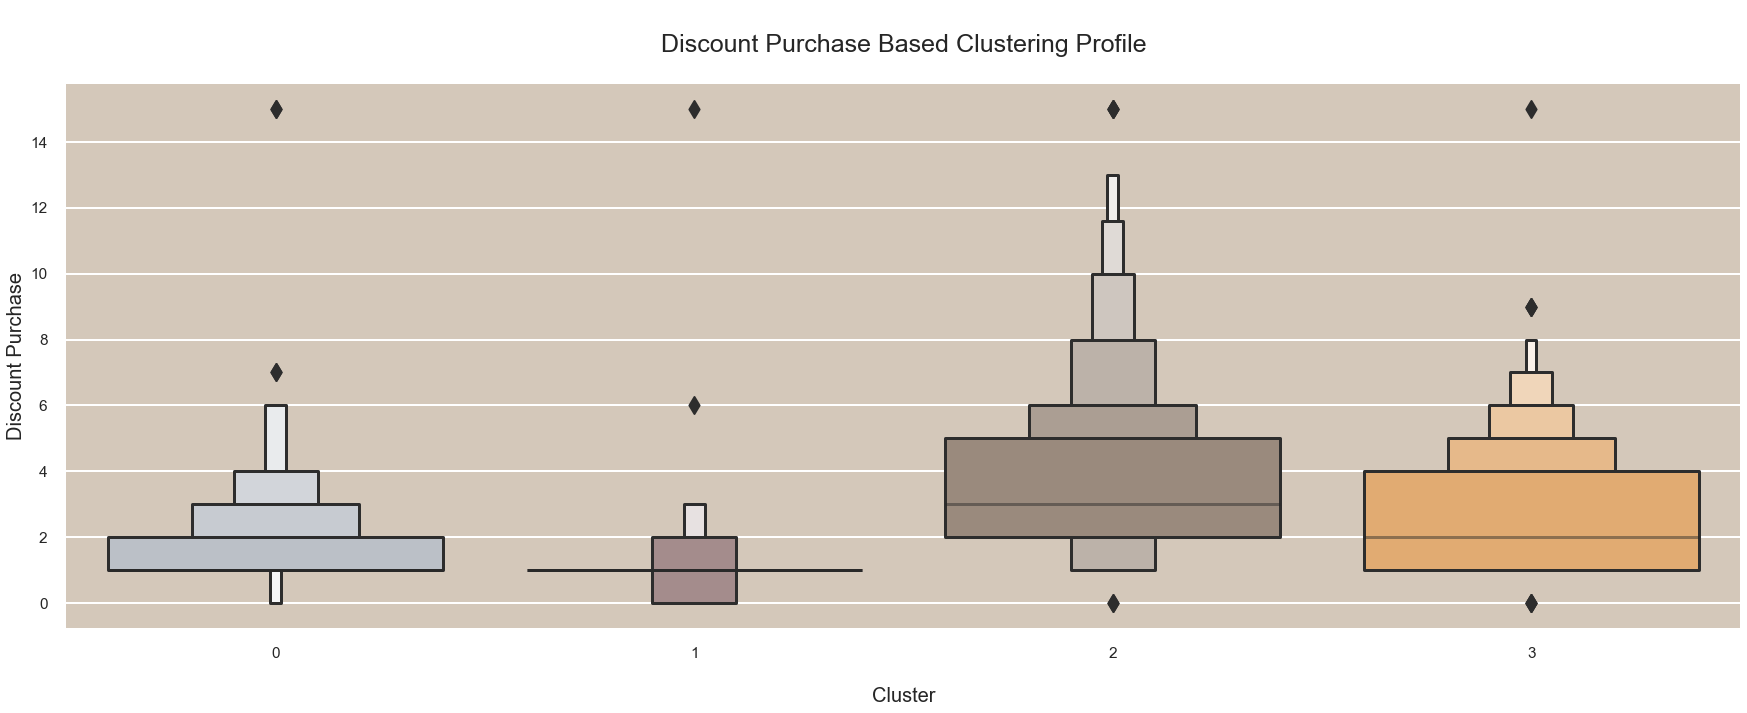

In [30]:
print(f"Let's have a look on the characteristics of the clusters on the basis of discount purchases :")

_, axes = plt.subplots(figsize=(30,10))
sns.boxenplot(x=data["Clusters"], y=data["Discount Purchases"], palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])

axes.set_title("\nDiscount Purchase Based Clustering Profile\n",fontsize=25)
axes.set_ylabel("Discount Purchase",fontsize=20)
axes.set_xlabel("\nCluster",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the customers of cluster 0 have completed purchases using discount either 1/2 times. 
* Most of the customers of cluster 1 have completed purchases using discount only one times.
* Most of the customers of cluster 2 have completed purchases using discount 2 to 5 times. 
* Most of the customers of cluster 3 have completed purchases using discount 1 to 4 times.

In [31]:

def cluster(feature):
    
    _, axes = plt.subplots(figsize=(20,8))
    sns.kdeplot(x=data[feature], y=data["Spent"], hue =data["Clusters"], kind="kde",height=10, palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])
    axes.set_title(f"\nClustering Profile On {feature}\n",fontsize=25)
    axes.set_ylabel("Spending",fontsize=20)
    axes.set_xlabel(f"\n{feature}",fontsize=20)
    
    sns.despine(left=True, bottom=True)
    plt.show()

Characteristics of clusters based on spending and having childern :


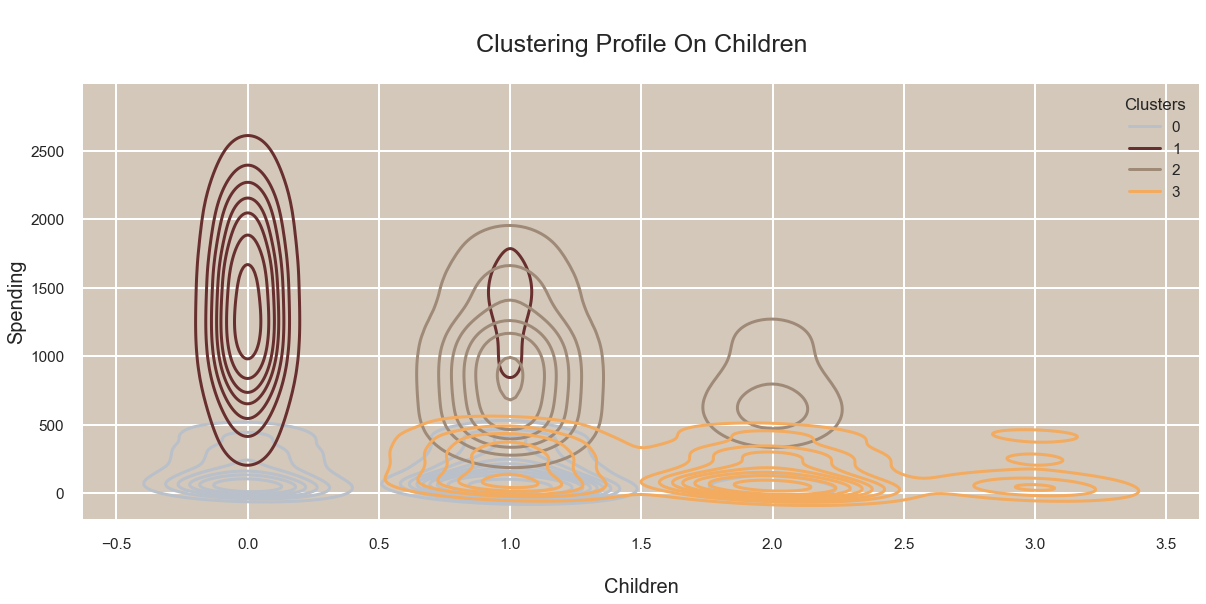

In [32]:
print(f"Characteristics of clusters based on spending and having childern :")
cluster("Children")

**Insights:**

* Customers of cluster 0 either have one child or don't have any. Their spending range is in between 0 to 500.
* Most of the customers of cluster 1 don't have any child, only a few have one. Their spending range is in between 550 to 2000.
* Most of the customers of cluster 2 have one child, some have two. Their spending range is in between 250 to 1800.
* Most of the customers of cluster 3 have two child, some have one and very few have three. Their spending range is in between 0 to 500.

Characteristics of clusters based on spending and age :


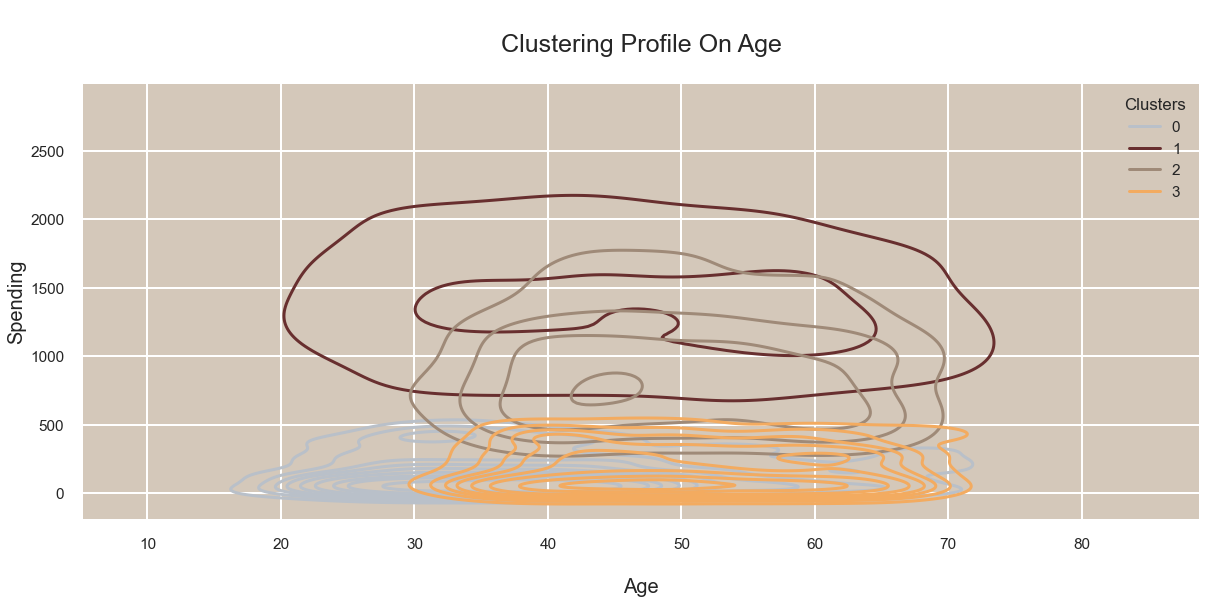

In [33]:
print(f"Characteristics of clusters based on spending and age :")
cluster("Age")

**Insights:**

* Most of the customers of cluster 0 have age range in between 25 to 50. Their spending range is in between 0 to 500.
* Most of the customers of cluster 1 have age range in between 30 to 60. Their spending range is in between 550 to 2000.
* Most of the customers of cluster 2 have age range in between 35 to 60. Their spending range is in between 250 to 1800.
* Most of the customers of cluster 3 have age range in between 40 to 65. Their spending range is in between 0 to 500.

Characteristics of clusters based on spending and education level :


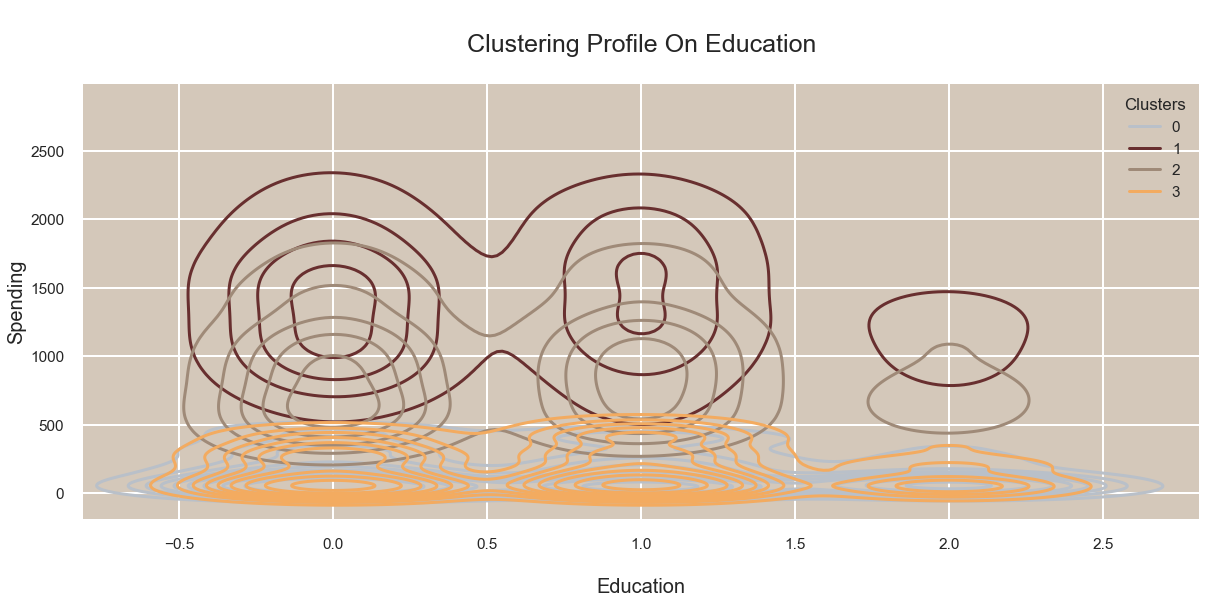

In [34]:
print(f"Characteristics of clusters based on spending and education level :")
cluster("Education")

**Insights:**

* The customers of cluster 0 are graduate or in postgraduate level or in undergraduate level. Their spending range is in between 0 to 500.
* Most of the customers of cluster 1 are graduate or in postgraduate level. Their spending range is in between 550 to 2000.
* Most of the customers of cluster 2 are graduate and very few in postgraduate level. Their spending range is in between 250 to 1800.
* All the customers of cluster 3 are graduate or in postgraduate level and some are in undergraduate level. Their spending range is in between 0 to 500.

Characteristics of clusters based on spending and marital status :


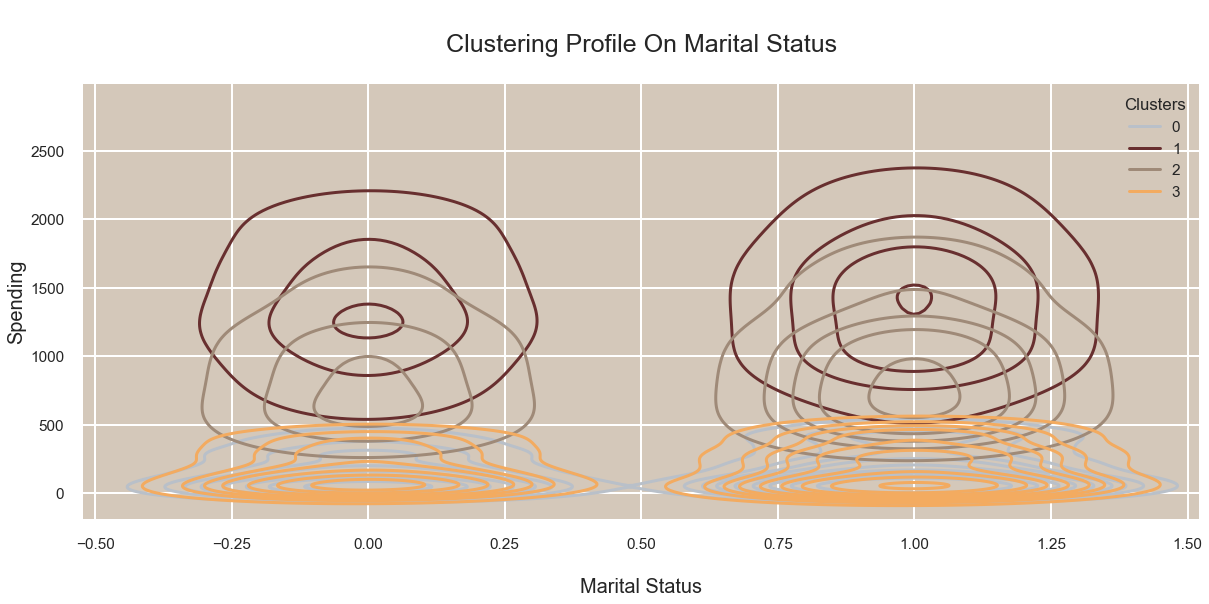

In [35]:
print(f"Characteristics of clusters based on spending and marital status :")
cluster("Marital Status")

**Insights:**

* Most of the customers of cluster 0 are married and very few are unmarried. Their spending range is in between 0 to 500.
* Most of the customers of cluster 1 are married. Their spending range is in between 550 to 2000.
* Most of the customers of cluster 2 are married. Their spending range is in between 250 to 1800.
* Some customers of cluster 3 are married and some are unmarried. Their spending range is in between 0 to 500.

Characteristics of clusters based on spending and parental status :


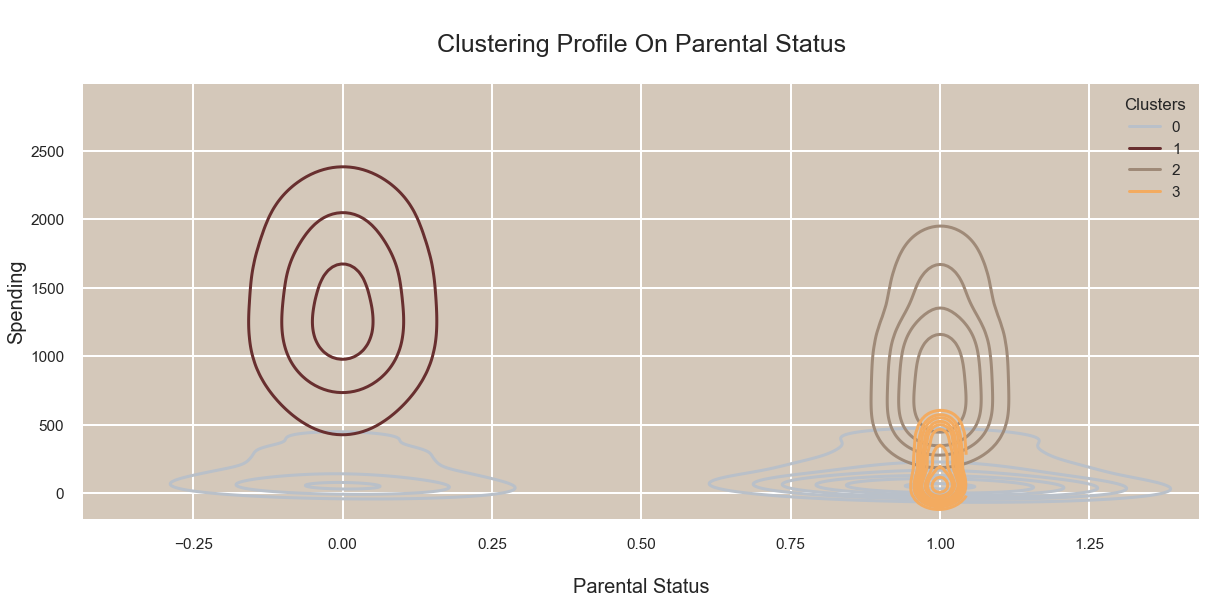

In [36]:
print(f"Characteristics of clusters based on spending and parental status :")
cluster("Parental Status")

**Insights:**

* Most of the customers of cluster 0 are parents and very few are not parents. Their spending range is in between 0 to 500.
* All the customers of cluster 1 are not parents. Their spending range is in between 550 to 2000.
* All the customers of cluster 2 are parents. Their spending range is in between 250 to 1800.
* All the customers of cluster 3 are parents. Their spending range is in between 0 to 500.

Characteristics of clusters based on spending and customer loyalty :


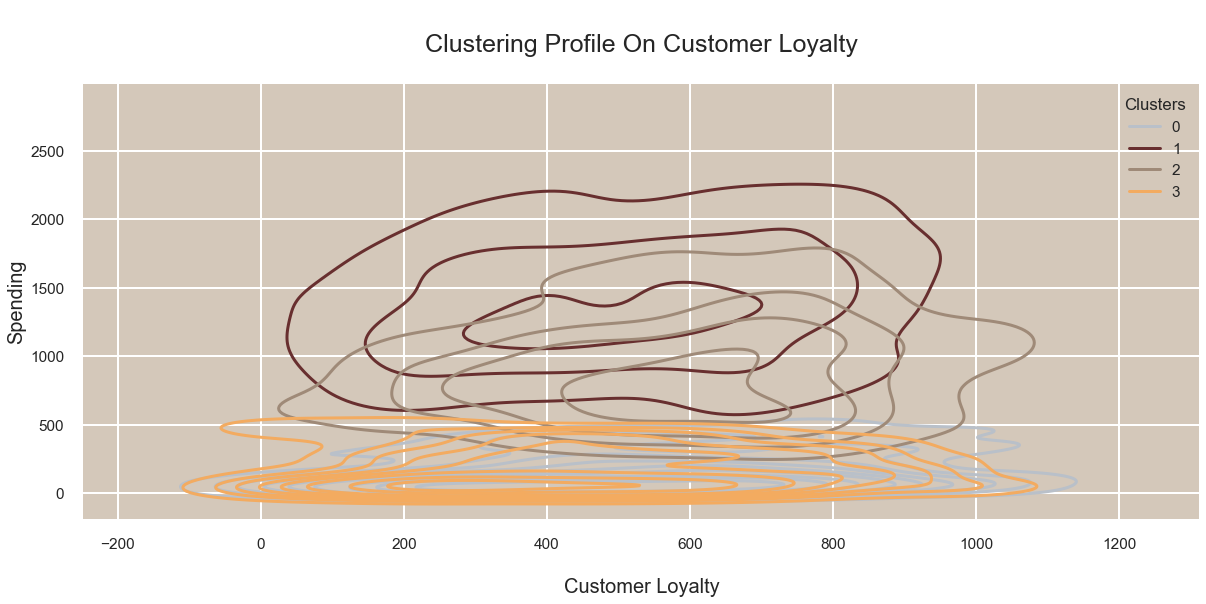

In [37]:
print(f"Characteristics of clusters based on spending and customer loyalty :")
cluster("Customer Loyalty")

**Insights:**

* Most of the customers of cluster 0 are customer for 300 to 900 days. Their spending range is in between 0 to 500.
* Most of the customers of cluster 1 are customer for 250 to 750 days. Their spending range is in between 550 to 2000.
* Most of the customers of cluster 2 are customer for 400 to 800 days. Their spending range is in between 250 to 1800.
* Most of the customers of cluster 3 are customer for 150 to 650 days. Their spending range is in between 0 to 500.

<a id="11"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Customer's Cluster Profiling</p>

<p>
<h3><font color="#682F2F">📌Cluster 0</font></h3>
👉 Income range is in between 5000 to 40000 and spending range is in between 0 to 500<br>
👉 Age range in between 25 to 50<br>
👉 From any educational level<br>
👉 Can be married and unmarried as well<br>
👉 Most of them are parents<br>
👉 Some have one child<br>
👉 Customer for at least 300 days<br>
👉 Promotion acceptance is rare<br>
👉 Very few complete purchases using discounts<br> 

<h3><font color="#682F2F">📌Cluster 1</font></h3>
👉 Income range is in between 65000 to 85000 and spending range is in between 550 to 2000<br>
👉 Age range in between 30 to 60<br>
👉 Almost all have completed graduation<br>
👉 Most of them are married<br>
👉 They are not parents<br>
👉 Have no child<br>
👉 Customer for at least 250 days<br>
👉 Promotion acceptance ratio is 0.5<br>
👉 Completing purchases using discounts are rare<br> 

<h3><font color="#682F2F">📌Cluster 2</font></h3>
👉 Income range is in between 50000 to 80000 and spending range is in between 250 to 1800<br>
👉 Age range in between 35 to 60<br>
👉 Almost all have completed graduation<br>
👉 Most of them are married<br>
👉 They are parents<br>
👉 All have children, most have one child<br>
👉 Customer for at least 400 days<br>
👉 Promotion acceptance ratio is poor<br>
👉 Highly interested in completing purchases using discounts<br> 

<h3><font color="#682F2F">📌Cluster 3</font></h3>
👉 Income range is in between 40000 to 60000 and spending range is in between 0 to 500<br>
👉 Age range in between 40 to 65<br>
👉 Almost all have completed graduation<br>
👉 Can be married and unmarried as well<br>
👉 They are parents<br>
👉 All have children, most have two children<br>
👉 Customer for at least 150 days<br>
👉 Promotion acceptance is rare<br>
👉 Highly interested in completing purchases using discounts<br> 

</p> 


<a id="12"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>
